<a href="https://colab.research.google.com/github/mir0codes/CMSC320SummerGroupProject/blob/main/Checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [16]:
# Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import scipy
import warnings

# Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Interactive Plotting Tools
import plotly.graph_objects as go
import plotly

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

**Parse Data + Organize**

In [17]:
# These are tweets a couple years back representing stocks being mentioned by random people on the internet.
stocktweet = pd.read_csv("stock_tweets.csv")
stocktweet

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [18]:
# This is stock data for the stocks that were mentioned within some of the tweets in the first dataset.
stock_data = pd.read_csv("stock_yfinance_data.csv")
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV


In [19]:
# Clearing out the @s for the Tweets to make them clearer.
import re

# Define a function to remove mentions from a tweet
def remove_mentions(tweet):
    return re.sub(r'@\w+', '', tweet)

# Apply the function to the Tweet column
stocktweet['Tweet'] = stocktweet['Tweet'].apply(remove_mentions)

# Save the cleaned data back to a CSV file, if needed
stocktweet.to_csv('cleaned_data.csv', index=False)

# Print the cleaned DataFrame to verify the changes
stocktweet

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,Hahaha why are you still trying to stop Tes...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"Stop trying to kill kids, you sad deranged o...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [20]:
# Merging the Two Datasets to give a valid tweet -> stock price representation

# Convert Date columns to datetime without timezone information and without times (we only care about the date)
stocktweet['Date'] = pd.to_datetime(stocktweet['Date']).dt.tz_localize(None).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None).dt.date

# Merge datasets on Date and Stock Name
merged_df = pd.merge(stocktweet, stock_data, on=['Date', 'Stock Name'], how='left')

# Sort tweets by date tweeted and reindexing
merged_df.sort_values(by=["Date"], inplace = True)
merged_df.reset_index(inplace=True)

# Display the first and last few rows of the merged DataFrame to verify the dates are sorted
merged_df

,index,Date,Tweet,Stock Name,Company Name,Open,High,Low,Close,Adj Close,Volume
0,80792,2021-09-30,Why can XPeng P5 deliver outstanding performan...,XPEV,XPeng Inc.,35.029999,36.110001,34.816002,35.540001,35.540001,6461500.0
1,37390,2021-09-30,$TSLA 3Q delivs are likely to be above 230K wh...,TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
2,37389,2021-09-30,I’ve got the feeling 🔋 Tesla and horses 🐎 will...,TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
3,37388,2021-09-30,When $TSLA next publishes earnings (Q3 ends to...,TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
4,37387,2021-09-30,The biggest $TSLA bull is a dog https://t.co/D...,TSLA,"Tesla, Inc.",260.333344,263.043335,258.333344,258.493347,258.493347,53868000.0
...,...,...,...,...,...,...,...,...,...,...,...
80788,41514,2022-09-29,Druckenmiller owned $CVNA this year \nMunger b...,PG,Procter & Gamble Company,131.869995,131.869995,128.259995,128.699997,127.793053,7128500.0
80789,41513,2022-09-29,Today’s drop in $SPX is a perfect example of w...,PG,Procter & Gamble Company,131.869995,131.869995,128.259995,128.699997,127.793053,7128500.0
80790,41512,2022-09-29,$NIO just because I'm down money doesn't mean ...,PG,Procter & Gamble Company,131.869995,131.869995,128.259995,128.699997,127.793053,7128500.0
80791,61016,2022-09-29,Analysts have recently called out these tech s...,NFLX,"Netflix, Inc.",241.610001,246.979996,235.679993,239.710007,239.710007,18994900.0


**Conclusions + Statistical Methods**

In [21]:
# William Rubin - T-Test


In [28]:
# Pranay Akula - ANOVA Test
merged_df_clean = merged_df.dropna(subset=['Adj Close'])

# Check if the cleaned dataframe has any NaN values left
print("Check for NaNs in cleaned data:")
print(merged_df_clean.isna().sum())

# Print the average 'Adj Close' values
avg_adj_close = merged_df_clean.groupby('Stock Name')['Adj Close'].mean().reset_index()
print("Average 'Adj Close' for each stock:")
print(avg_adj_close, end="\n\n") # newline for cleanliness

# Get the count of unique stocks
unique_stock_count = merged_df_clean['Stock Name'].nunique()
print(f"Number of unique stocks: {unique_stock_count}")

# Check number of data points per stock
group_sizes = merged_df_clean.groupby('Stock Name').size()
print("Number of data points per stock:")
print(group_sizes)

# Perform ANOVA test on the adjusted 'Adj Close' values
stock_names = merged_df_clean['Stock Name'].unique()
adj_close_data = [merged_df_clean['Adj Close'][merged_df_clean['Stock Name'] == stock] for stock in stock_names]

anova_result = f_oneway(*adj_close_data)

# Print ANOVA test result
print("\nANOVA test result:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

Check for NaNs in cleaned data:
index           0
Date            0
Tweet           0
Stock Name      0
Company Name    0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64
Average 'Adj Close' for each stock:
   Stock Name   Adj Close
0        AAPL  158.949847
1         AMD  110.739538
2        AMZN  142.243956
3          BA  190.544477
4          BX  113.306495
5        COST  509.653180
6         CRM  204.565144
7         DIS  134.904651
8        ENPH  249.427267
9           F   15.872072
10       GOOG  127.573216
11       INTC   41.509379
12         KO   60.151648
13       META  256.918062
14       MSFT  288.570933
15       NFLX  332.772137
16        NIO   26.433655
17        NOC  431.256039
18         PG  149.419906
19       PYPL  154.344905
20       TSLA  306.104950
21        TSM  102.971784
22         VZ   47.069417
23       XPEV   38.841471
24         ZS  235.949231

Number of unique stocks: 25
Number of data p

**Data Visualization**

Now that the data is cleaned, we can work on some visualization. First, we can group and count the tweets based on the stock mentioned.

<ipython-input-23-9d24e85d9800>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  tweet_ps = sns.countplot(x = 'Stock Name', data = merged_df, order = merged_df['Stock Name'].value_counts().index, palette=sns.color_palette('flare', n_colors=25))


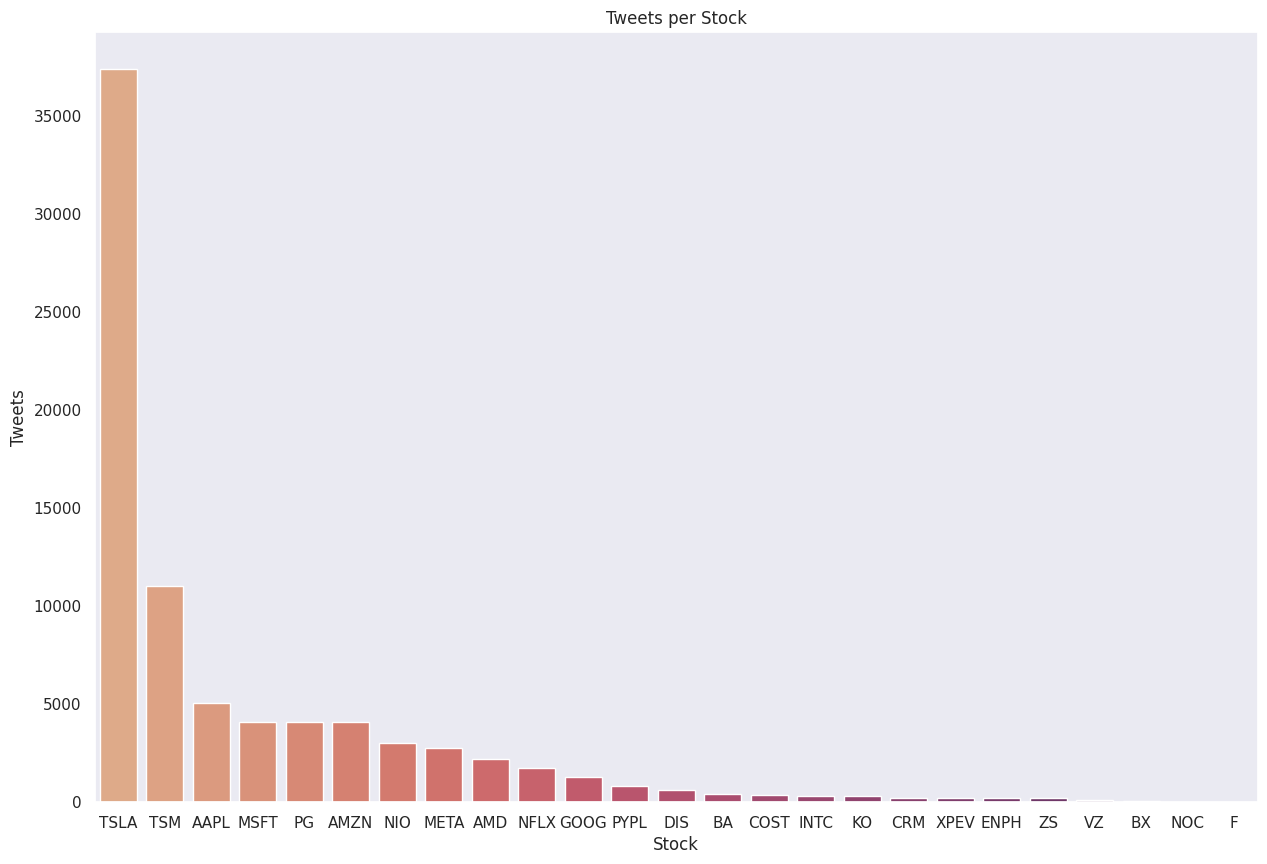

In [23]:
#Using seaborn (sns) and matplotlib (plt) to visualize data
plt.figure(figsize = (15, 10))
sns.set_style("dark")
plt.title('Tweets per Stock')
plt.xlabel('Stock')
plt.ylabel('Tweets')
tweet_ps = sns.countplot(x = 'Stock Name', data = merged_df, order = merged_df['Stock Name'].value_counts().index, palette=sns.color_palette('flare', n_colors=25))
sns.set()

As we can see, Tesla has the most tweets, and by a large margin (three times the tweets of Taiwan Semiconductor Manufacturing!).

(I'm not done yet)

**Conclusions**